# Students adaptability level online

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/work/students_adaptability_level_online_education.csv', delimiter=',')
df.head(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [3]:
df.shape

(1205, 14)

## Limpieza de datos

Para este dataset no tuve muchos problemas con la limpieza de datos, por lo que únicamente tuve que asignarle el tipo de dato correcto para cada variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


En la columna 'Institution Type' existen dos posibles valores: Government y Non Government. Quise cambiarle el nombre para que sea más fácil de entender, teniendo en cuenta que la mayoria de Instituciones que no pertenecen al gobierno son privadas o semiprivadas en su defecto. 

In [5]:
df['Institution Type'] = df['Institution Type'].apply(lambda x: 'Private' if x == 'Non Government' else x)

In [6]:
df['Location'] = df['Location'].apply(lambda x: 'Town' if x == 'Yes' else ('City' if x == 'No' else x))

Para realizar este análisis consideré que no requería de las columnas 'Self lms' y 'Load-Shedding' por lo que para aligerar el dataframe las eliminé

In [7]:
df.drop(['Self Lms'], axis=1, inplace=True)

In [8]:
df.drop(['Load-shedding'], axis=1, inplace=True)

Cambié el tipo de datos de algunas variables a 'category' para trabajarlas mejor

In [9]:
df['Institution Type'].astype('category')
df['Gender'].astype('category')
df['Network Type'].astype('category')
df['Financial Condition'].astype('category')
df['Adaptivity Level'].astype('category')

0       Moderate
1       Moderate
2       Moderate
3       Moderate
4            Low
          ...   
1200         Low
1201    Moderate
1202    Moderate
1203         Low
1204    Moderate
Name: Adaptivity Level, Length: 1205, dtype: category
Categories (3, object): ['High', 'Low', 'Moderate']

## Explorando datos

Conozcamos los datos que tenemos

In [10]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Financial Condition,Internet Type,Network Type,Class Duration,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,3,2,3,3,3,3
top,Boy,21-25,School,Private,No,Town,Mid,Mobile Data,4G,1-3,Mobile,Moderate
freq,663,374,530,823,901,935,878,695,775,840,1013,625


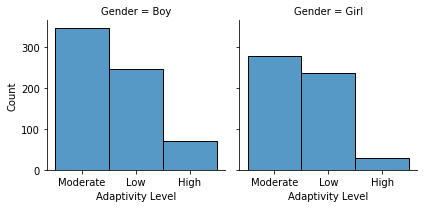

In [11]:
a = sns.FacetGrid(data=df, col='Gender')
a.map(sns.histplot, "Adaptivity Level")

<AxesSubplot:xlabel='Education Level', ylabel='Count'>

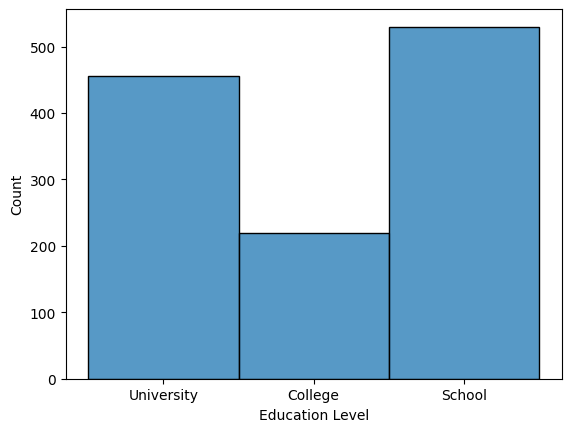

In [12]:
sns.histplot(data=df, x='Education Level')

### Evaluemos las posibles limitaciones a la adaptabilidad online

#### Conectividad

<AxesSubplot:xlabel='Internet Type', ylabel='Count'>

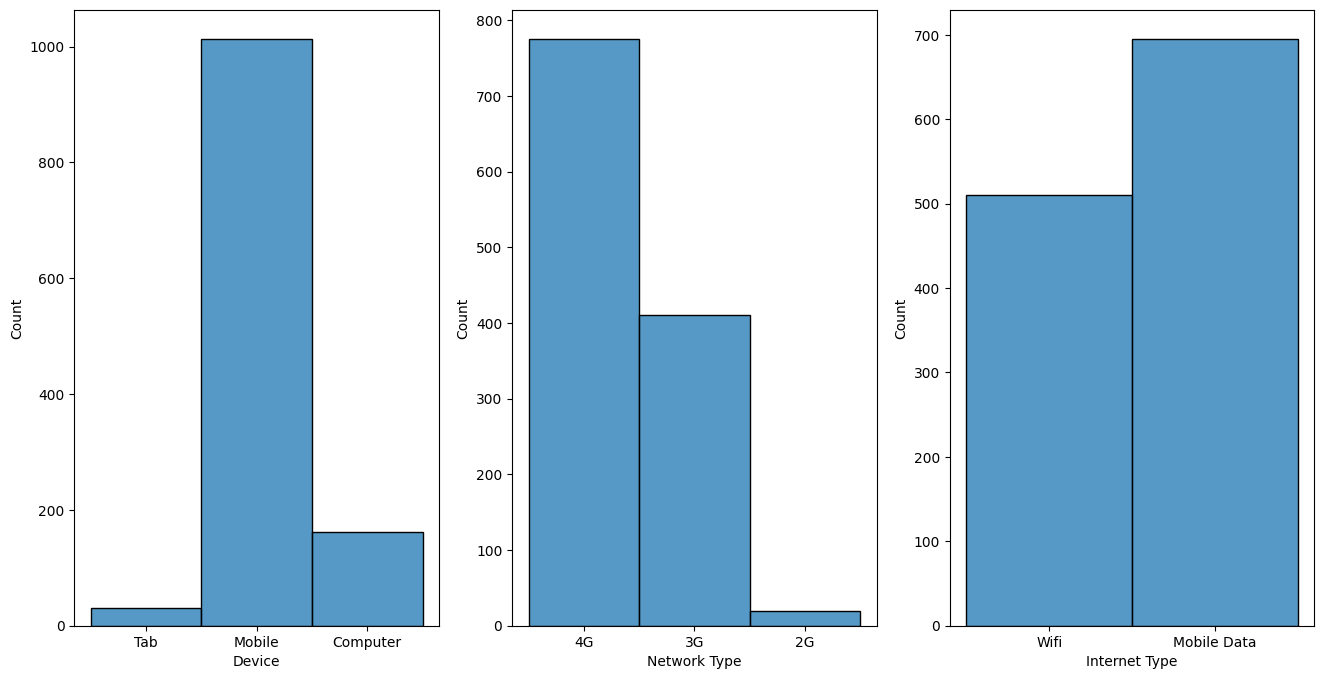

In [13]:
# mobile = df[(df['Device'] == 'Mobile')].count
devices = df.groupby(['Device']).count()
network = df.groupby(['Network Type']).count()

fig, axes = plt.subplots(1,3, figsize=(16,8))
sns.histplot(ax=axes[0], data=df, x='Device')
sns.histplot(ax=axes[1], data=df, x='Network Type')
sns.histplot(ax=axes[2], data=df, x='Internet Type')

<AxesSubplot:xlabel='Location', ylabel='Count'>

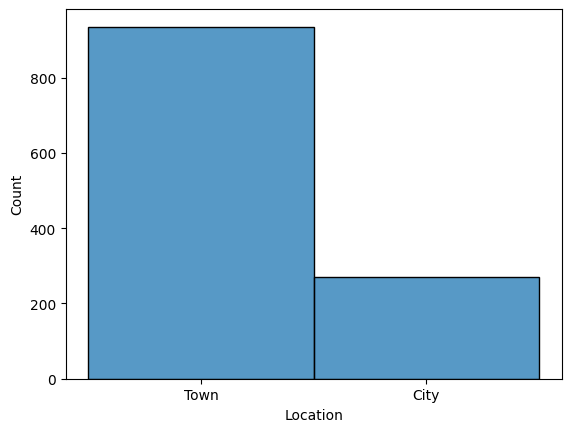

In [14]:
sns.histplot(data=df, x='Location')

<AxesSubplot:xlabel='Financial Condition', ylabel='Count'>

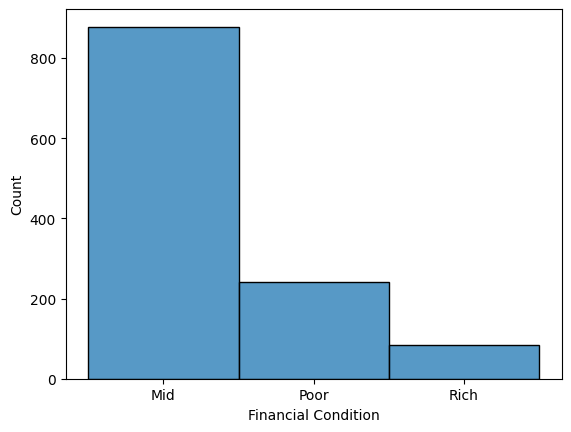

In [15]:
sns.histplot(data=df, x='Financial Condition')

In [17]:
adaplow = df[(df['Adaptivity Level'] == 'Low')].count()
adaplow

Gender                 480
Age                    480
Education Level        480
Institution Type       480
IT Student             480
Location               480
Financial Condition    480
Internet Type          480
Network Type           480
Class Duration         480
Device                 480
Adaptivity Level       480
dtype: int64

In [18]:
adapm = df[(df['Adaptivity Level'] == 'Moderate')].count()
adapm

Gender                 625
Age                    625
Education Level        625
Institution Type       625
IT Student             625
Location               625
Financial Condition    625
Internet Type          625
Network Type           625
Class Duration         625
Device                 625
Adaptivity Level       625
dtype: int64

In [19]:
adaph = df[(df['Adaptivity Level'] == 'High')].count()
adaph

Gender                 100
Age                    100
Education Level        100
Institution Type       100
IT Student             100
Location               100
Financial Condition    100
Internet Type          100
Network Type           100
Class Duration         100
Device                 100
Adaptivity Level       100
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

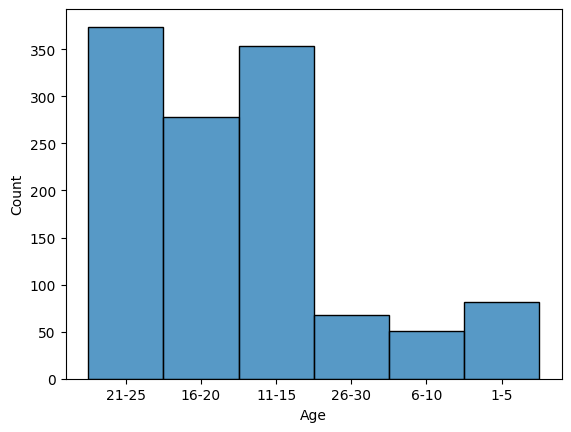

In [21]:
sns.histplot(data=df, x='Age')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e60471dd-9764-48b5-a080-e5c55dbaa55b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>